IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

- Ekaterina BOGUSH
- Amélie CHU

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from unidecode import unidecode 
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# sparse matrix
from scipy.sparse import csr_array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [2]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


<BarContainer object of 20 artists>

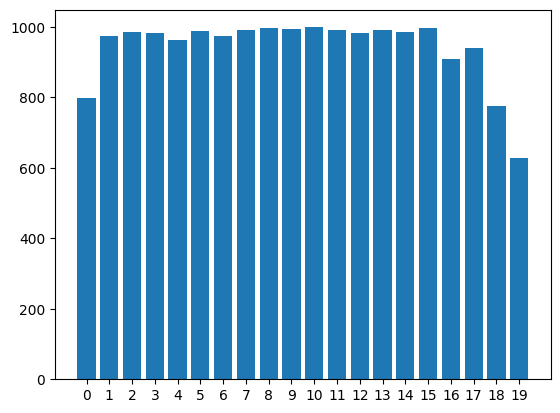

In [5]:
values, count = np.unique(newsgroups_df["target"], return_counts=True)
plt.xticks(range(20))
plt.bar(values, count)

### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [6]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stopwords = stop_words_df["stopword"].values.tolist()
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [7]:
# Delete nans
print("Number of Nans", newsgroups_df[newsgroups_df["messages"].isna()].shape[0])
newsgroups_df = newsgroups_df[~newsgroups_df["messages"].isna()]

Number of Nans 380


1. Mettre toutes les lettre en miniscules
2. Enlever punctuation (sauf ')
3. Enlever stopwords ***si nécessaire***
4. Enlever les mots qui ne contient que les chiffres

In [8]:
def clean_str(news:pd.DataFrame, stopwords:list[str], delete_stopwords:bool=True, delete_digits:bool=True) -> pd.DataFrame:
    """
    Fait un prétraitement de la base de données 'news' :
        1. Supprime les NaNs
        2. Convertit unicode en ascii
        3. Supprime '\n \r \t' et toute la punctuation sauf '
        4. Supprime les stopwords [si nécessaire]
        5. Supprime les chiffres qui sont seuls (sans lettres à coté) [si nécessaire]
    
    Parameters
    ----------
        news : Database qui contient la base de données sur 'news'. Colonne 'messages' doit être présent.
        stopwords : Liste des stopwords
        delete_stopwords : Si True, alors les stopwords seront enlevés. Si False, ils seront préservés.
        
    Returns
    -------
        Dataframe 'news' nettoyé selon les 4 étapes ci-dessus
            (et avec la colonne 'Message index' ajouté --> TO DO : see if useful later. If not, delete).
    """

    def del_stopwords(tokenized_msg:list[str]) -> list[str]:
        return [word for word in tokenized_msg if word not in stopwords and word != "\'"]

    def del_digits(tokenized_msg:list[str]) -> list[str]:
        return [word for word in tokenized_msg if not word.isdigit()]
     
    # To be able to implode afterwards if necessary --> see later if it is useful
    news = news.reset_index().rename(columns={"index":"Message index"})

    # Delete NaNs
    print("Number of Nans", news["messages"].isna().size)
    news.loc[:, "messages"] = news[~news["messages"].isna()]

    # Convert unicode to ascii. Delete \n \r \t
    news.loc[:, "messages"] = news["messages"].apply(unidecode).str.replace(r'[\n\r\t]', '', regex=True)
    
    # Delete all punctuation but '
    punc = punctuation.replace('\'', '')
    trans_table = str.maketrans(punc, ' ' * len(punc))
    news.loc[:, "messages"] = news["messages"].str.lower().str.translate(trans_table).str.split()

    # Delete stopwords if necessary
    if delete_stopwords:
        news.loc[:, "messages"] = news["messages"].apply(del_stopwords)
    
    if delete_digits:
        news.loc[:, "messages"] = news["messages"].apply(del_digits)

    return news

def get_corpus(news:pd.DataFrame) -> list[str]:
    return news["messages"].explode().unique()

def get_bow_vect(news:pd.DataFrame, corpus:list[str], binary=False) -> csr_array:
   vectorizer = CountVectorizer(vocabulary=corpus, binary=binary)
   return vectorizer.transform(news["messages"])

def get_tfidf_vect(news:pd.DataFrame, corpus:list[str]) -> csr_array:
    vectorizer = TfidfVectorizer(vocabulary=corpus)
    return vectorizer.fit_transform(news["messages"])

In [9]:
from typing import Tuple

# source catégories https://www.kaggle.com/code/yeayates21/20-newsgroups-to-pandas-dataframe 
# et http://qwone.com/~jason/20Newsgroups/ (page ScikitLearn)

categories = dict({
    0: "alt.atheism",
    1: "comp.graphics",
    2: "comp.sys.ibm.pc.hardware",
    3: "comp.sys.mac.hardware",
    4: "comp.windows.x",
    5: "misc.forsale",
    6: "rec.autos",
    7: "rec.motorcycles",
    8: "rec.sport.baseball",
    9: "rec.sport.hockey",
    10: "sci.crypt",
    11: "sci.electronics",
    12: "sci.med",
    13: "sci.space",
    14: "soc.religion.christian",
    15: "talk.politics.guns",
    16: "talk.politics.mideast",
    17: "talk.politics.misc",
    18: "talk.religion.misc",
    19: "comp.os.ms-windows.misc"
})

def perc_df(news: pd.DataFrame, p: float)->pd.DataFrame:
    """ Renvoie p pourcent de la base de donnée avec la même distribution de classes
    
    Parameters
    ----------
        news: la base de données
        p : pourcentage

    Returns
    -------
        Sous échantillon de la base
    """

    class_sample = int(p*len(news)) // len(news["target"].unique())

    return news.groupby('target', group_keys=False).apply(lambda x: x.sample(n=class_sample, random_state=42)).reset_index(drop=True) # random state pour test

def lemma_df(news:pd.DataFrame, x: int = None) -> Tuple[pd.DataFrame, list]:
    """ Lemmatise les message de la base news et renvoie les lemmas pour le corpus 

    Parameters
    ----------
        news : base de données
        x : nombre d'éléments dans le corpus

    Returns
    --------
        Base de données lemmatisé
        Corpus, liste des lemmas
    """

    words = news.explode("messages").dropna(subset=["messages"])

    wnl = WordNetLemmatizer()
    unique_words = pd.DataFrame(data={"word":words["messages"].unique()})
    unique_words["lemma"] = unique_words["word"].apply(wnl.lemmatize)
    
    words = words.merge(unique_words, left_on="messages", right_on="word").drop(columns="word")

    # Min length = 3
    words = words[words["lemma"].apply(len) > 2] 

    # Min count = 10
    count = words["lemma"].value_counts()
    count = count[count >= 10]
    words = words[words["lemma"].isin(count.index)]

    # corpus top x most frequent lemma 
    corpus = count.head(x).index
    words = words[words["lemma"].isin(corpus)]
    
    messages = words.groupby("Message index")["lemma"].apply(" ".join).reset_index()
    news = news[["Message index", "target"]].merge(messages, on="Message index").rename(columns={"lemma":"messages"})

    # add categories
    news['label'] = news['target'].map(categories)

    return news, corpus

### Lemmatisation et le tri supplémentaire

In [10]:
# 10% de la base
reduce_news_no_stopwords = perc_df(newsgroups_df, 0.1)

/tmp/ipykernel_25574/3189891206.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return news.groupby('target', group_keys=False).apply(lambda x: x.sample(n=class_sample, random_state=42)).reset_index(drop=True) # random state pour test


In [11]:
# nettoyage et lemmatisation
news_no_stopwords = clean_str(reduce_news_no_stopwords, stopwords, delete_stopwords=True, delete_digits=True)
news_no_stopwords, corpus = lemma_df(news_no_stopwords)
news_no_stopwords.shape, corpus.shape

Number of Nans 1840


((1815, 4), (3012,))

In [12]:
news_no_stopwords

,Message index,target,messages,label
0,0,0,way news article can't remember one reading ne...,alt.atheism
1,1,0,consider action sure know trying say,alt.atheism
2,2,0,stuff deleted actually get weapon follower kin...,alt.atheism
3,3,0,stuff deleted bill seem assumed board purpose ...,alt.atheism
4,4,0,agree increase increase pre sex others think t...,alt.atheism
...,...,...,...,...
1810,1835,19,frank unless realize involved debate various o...,comp.os.ms-windows.misc
1811,1836,19,correct event center merely distance escape ve...,comp.os.ms-windows.misc
1812,1837,19,brian present false must accept every thing bo...,comp.os.ms-windows.misc
1813,1838,19,shall like tree,comp.os.ms-windows.misc


# Apprentissage non-supervisé

In [13]:
# test sur données : 
# avec sans stop words
# bag-of-words binaire, avec fréquences, avec tfidf

# - clustering hierarchique -> regarder séparation de 2O groupes ce que ca donne visualement, modifier code pour s'arrêter à 20 groupes 
# - clustering kmeans -> 20 clusters -> matrice de repartition
# - clustering knmean -> != k pour voir combien de clusters bien
# - test sur 2 index + compacité et séparabilité

# compacité = intertie total, compacité du cluster
# séparabilité = somme distance centroid entre chaque centroid

# index de Dunn : cours : somme distance des points au centroid / dist min entre 2 clusters
# index XB : inertie total / dist min entre 2 clusters -> a voir si maxi ou non
# index Dunn 2

##### Choix et définition des métriques:
Soit $k$ le nombre de clusters et $\mu_i$ le centroide d'un cluster $C_i$
- compacité : inertie globale (minimiser)
$$\sum_{i=1}^k\sum_{x\in C_i} ||x - \mu_i||²$$

- co-distance : (minimiser)
$$\sum_{i=1}^k\sum_{x\in C_i} ||x - \mu_i||$$

- séparabilité : (maximiser)
 $$\sum_{i<j} ||\mu_i - \mu_j||$$

(définition du cours)
- Xie-Beni : (minimiser)
$$ \dfrac{\text{inertie globale}}{\text{min}_{i\neq j}||\mu_i - \mu_j||}$$

- Dunn : (minimiser)
$$ \dfrac{\text{co-distance}}{\text{min}_{i\neq j}||\mu_i - \mu_j||}$$

## Sans stopwords

## K-means

In [15]:
import itertools
from typing import Callable
from scipy.spatial.distance import cdist

def separabilite(centers: np.array, func_dist: Callable = clust.dist_euclidienne) -> float:
    """ Calcule la somme des distances entre 2 centroids pour toutes les distances pair à pair
    Renvoie la somme desistances, la distance minimal et maximal entre les clusters """
    index = range(len(centers))
    pairs = list(itertools.combinations(index, 2))

    sep_score = 0
    min_dist = np.inf
    max_dist = -1 

    for i, j in pairs:
        distance = func_dist(centers[i],centers[j])
        sep_score += distance

        min_dist = min(min_dist, distance)
        max_dist = max(max_dist, distance)
            
    return sep_score, min_dist, max_dist # min_dist pour séparabilité, max_dist pour Dunn 2

def min_dist_clusters(Base: Tuple[np.ndarray, pd.DataFrame], affectation: dict)-> float:
    """Renvoie la distance minimale entre 2 clusters, la distance entre 2 clusters 
    étant le min des distances entre 2 points de 2 clusters."""

    index = affectation.keys() # indice des clusters
    
    if isinstance(Base, pd.DataFrame):
        Base = Base.to_numpy()
        
    # calculer les distances entre tous les points des pairs
    clusters = {k: Base[v] for k, v in affectation.items()}

    min_dist = np.inf

    for i, j in list(itertools.combinations(index, 2)):
        clust1, clust2 = clusters[i], clusters[j]
        min_dist = min(np.min(cdist(clust1, clust2)), min_dist)
    
    return min_dist

def co_distance(centers: np.array, Base: pd.DataFrame, partition: dict, func_dist: Callable = clust.dist_euclidienne) -> float:
    """Renvoie la co distance, somme distance des points au centroid"""
    co_dst_score = 0

    if isinstance(Base, pd.DataFrame):
        Base = Base.to_numpy()

    for clust, index in partition.items():
        points = Base[index]
        
        distances = np.array([func_dist(point, centers[clust]) for point in points])
        co_dst_score += np.sum(distances)

    return co_dst_score

def predict_label(affectation: dict)-> list:
    """Renvoie les labels prédit par l'affectation k-means pour chaque exemple"""
    
    aff = [(i,cluster) for cluster, ids in affectation.items() for i in ids]
    indices, clusters = zip(*aff)

    cluster_labels = np.full(max(indices) + 1, -1, dtype=int) # list size of labels 

    cluster_labels[list(indices)] = list(clusters)
    return cluster_labels
        
def distribution_target(true_label: np.ndarray, prediction_clusters: np.ndarray):
    """Affiche la distribution des targets dans les clusters obtenus"""

    actual_pd = pd.Categorical(true_label, categories=np.unique(true_label))
    pred_pd = pd.Categorical(prediction_clusters, categories=np.unique(prediction_clusters))

    conf = pd.crosstab(actual_pd, pred_pd, normalize=False, colnames=["Clusters obtenus"], rownames=["Nombre d'éléments d'un cluster d'origine"], dropna=False)

    plt.figure(figsize=(10, 6))
    sns.heatmap(conf, annot=True,fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.show()    

def variation_k_evalution(vect: Tuple[np.ndarray, pd.DataFrame], range_max = 26, verbose = False):
    """Evalue pour un espace défini des exemples (bag of words, frequences ou tf_idf), les métriques définit précédemment:
    - inertie globale
    - co-distance
    - séparabilité
    - index de Xie-Beni
    - index de Dunn

    pour k-means avec k variant de 1 à range_max
    """

    k_list = range(1,range_max)

    k_global_inertia    = []
    k_co_dist           = []
    k_separability      = []
    k_XB_index          = []
    k_Dunn_index        = []

    for k in k_list:
        centres, affectation = clust.kmoyennes(k, vect, 0, 1000, verbose)

        inertie_glob = clust.inertie_globale(vect, affectation)
        k_global_inertia.append(inertie_glob)

        sep_score, semin, d_max = separabilite(centres) # semin dist min between 2 centroids
        k_separability.append(sep_score)

        co_dist = co_distance(centres, vect, affectation)
        k_co_dist.append(co_dist)

        # d_min = min_dist_clusters(bow_no_stopw, affectation)

        # # Dunn index 2
        # k_Dunn_index2.append(d_min/d_max)

        # XieBeni index = glob_inertia / semin 
        k_XB_index.append(inertie_glob/semin)

        # Dunn index = co_dist / semin
        k_Dunn_index.append(co_dist/semin)   

    return k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index


def scores_plot(title, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index):
    # affichage des résultats
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(3, 2, figsize=(15, 10))
    fig.suptitle(title, fontsize=14)

    plots_info = [
        (k_global_inertia, 'Inertie globale'),
        (k_co_dist, 'Co distance'),
        (k_separability, 'Séparabilité'),
        (k_XB_index, 'Index de Xie-Beni'),
        (k_Dunn_index, 'Index de Dunn'),
    ]

    for ax, (data, title) in zip(axes.flat, plots_info):
        ax.plot(data)
        ax.set_title(title)
        ax.set_xlabel('k')
        ax.set_ylabel('valeur')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Bag of Words

In [16]:
# BoW binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=True)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw.shape

(1815, 3012)

In [ ]:
k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index = variation_k_evalution(bow_no_stopw)

<Figure size 640x480 with 0 Axes>

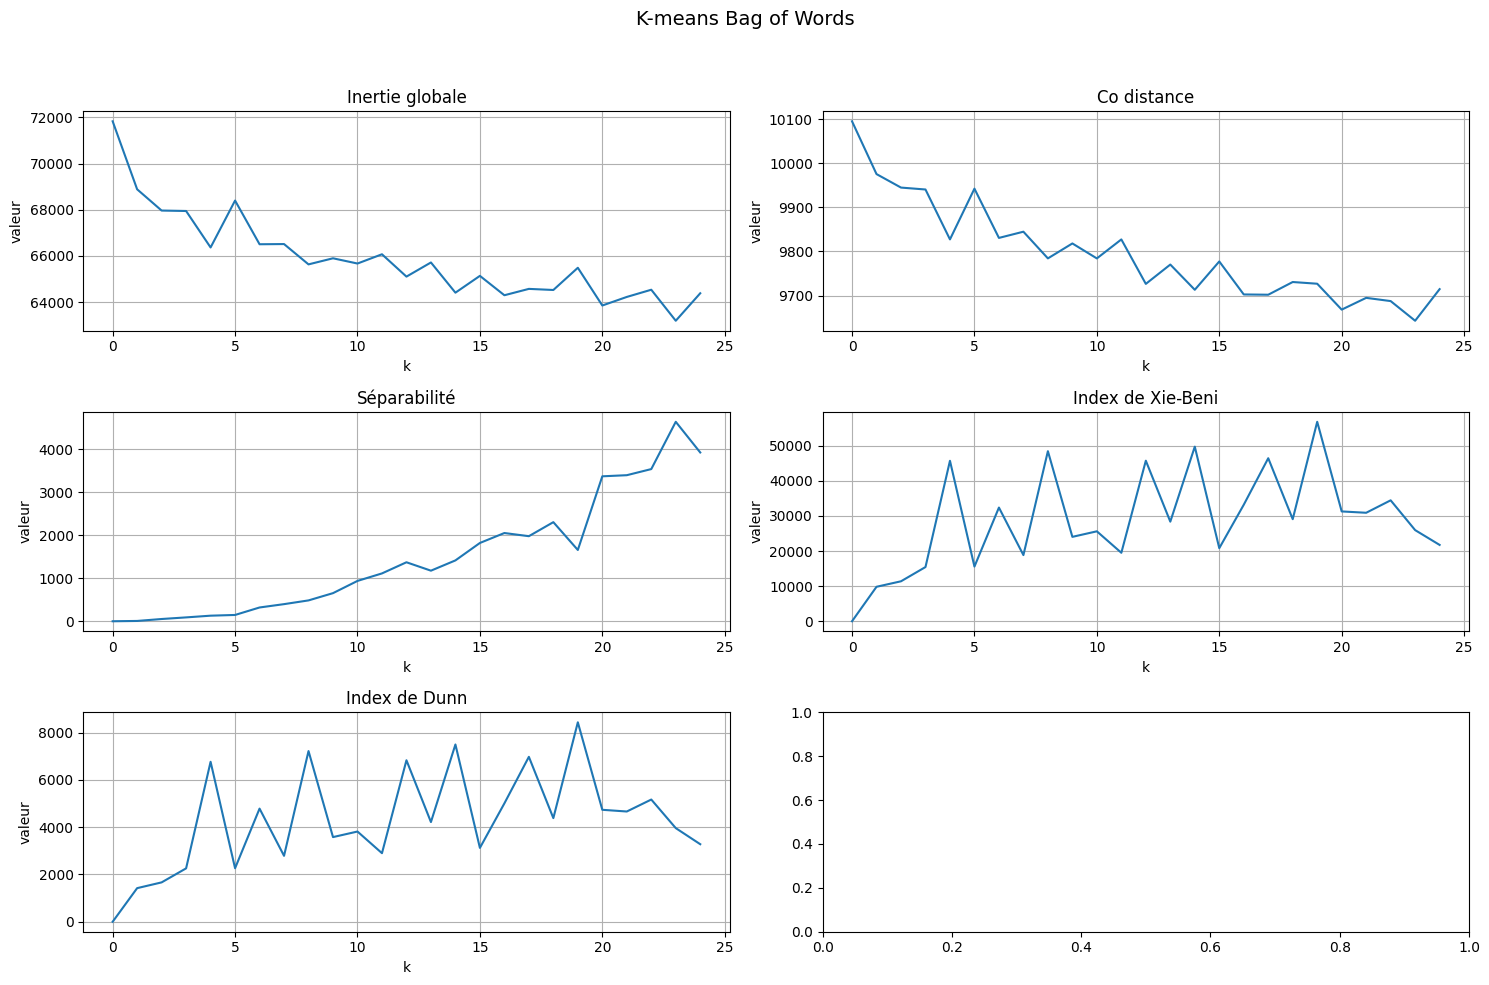

In [ ]:
scores_plot("K-means Bag of Words", k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index)

### Frequences

In [202]:
# BoW binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=False)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw = clust.normalisation(bow_no_stopw) # normaliser fréquence
bow_no_stopw.shape

(1815, 3012)

In [204]:
k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index = variation_k_evalution(bow_no_stopw)

<Figure size 640x480 with 0 Axes>

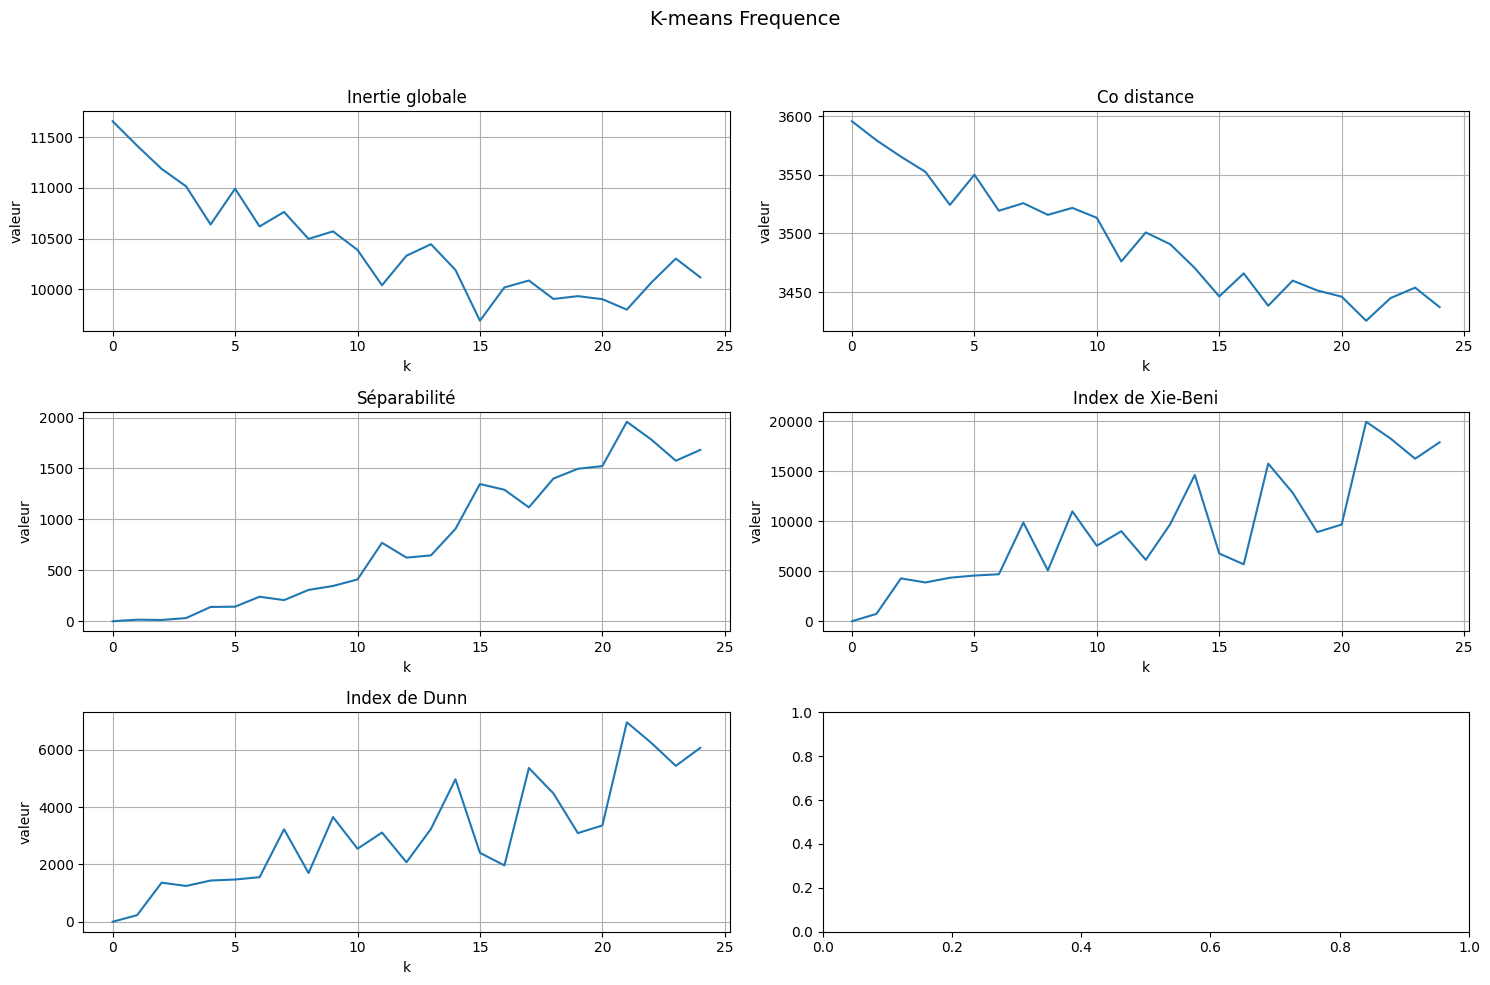

In [205]:
scores_plot("K-means Frequence", k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index)

### TF-IDF

In [ ]:
news_desc = get_tfidf_vect(news_no_stopwords, corpus)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw.shape

(1815, 3012)

In [199]:
k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index = variation_k_evalution(bow_no_stopw)

<Figure size 640x480 with 0 Axes>

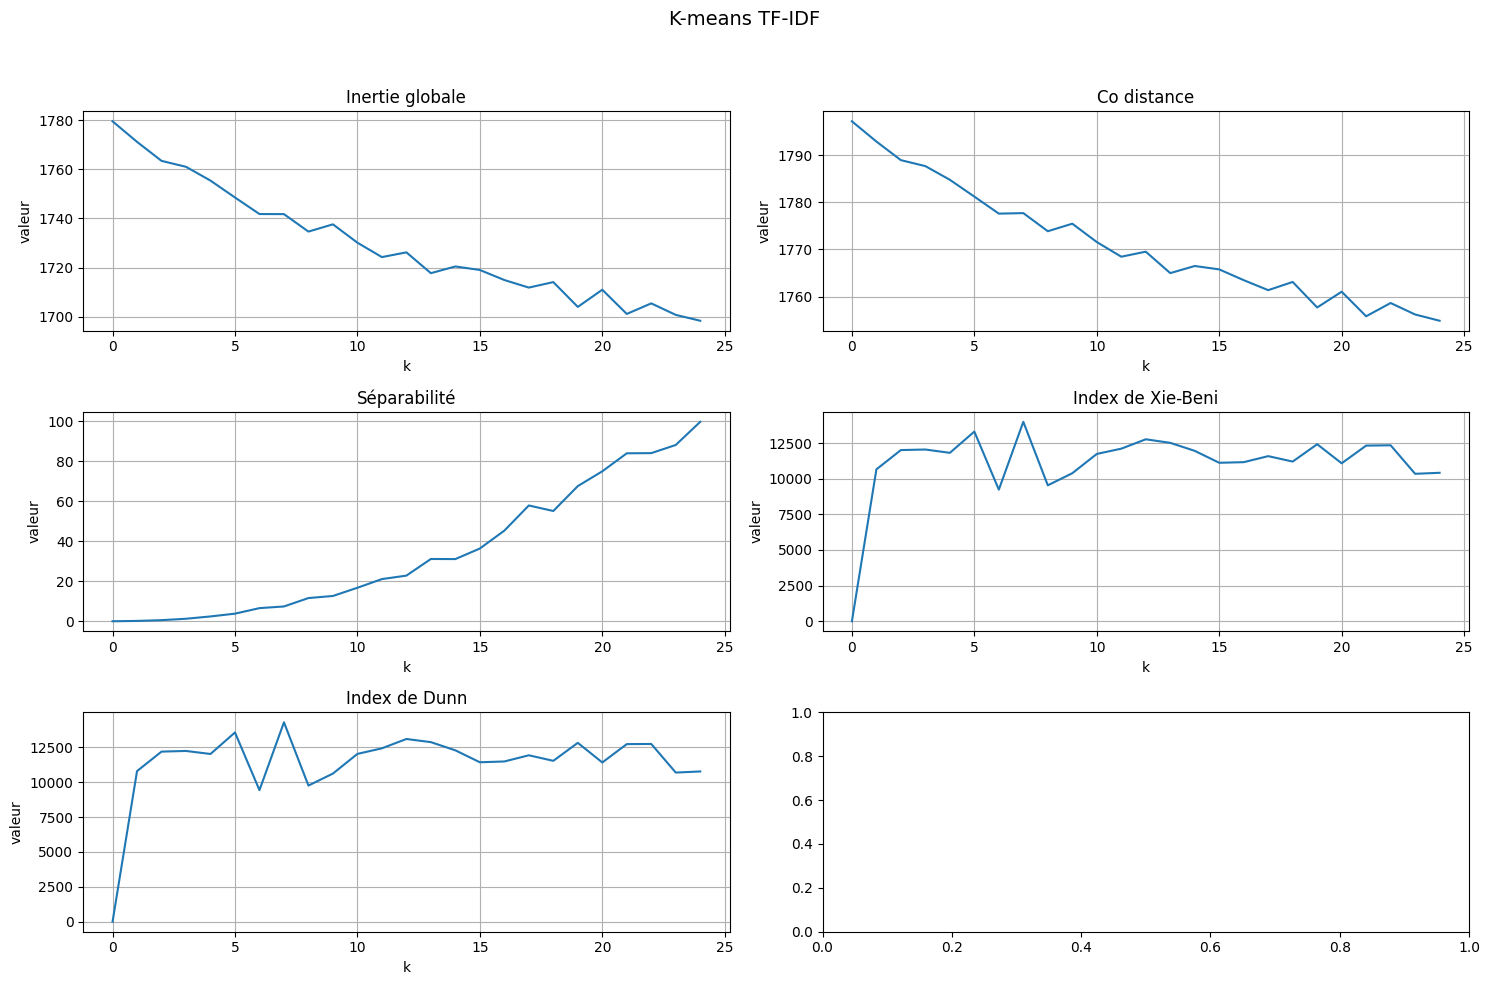

In [200]:
scores_plot("K-means TF-IDF", k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index)

### Visualisation des clusters

##### TF-IDF

In [ ]:
news_desc = get_tfidf_vect(news_no_stopwords, corpus)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw.shape

Pour $k=6$

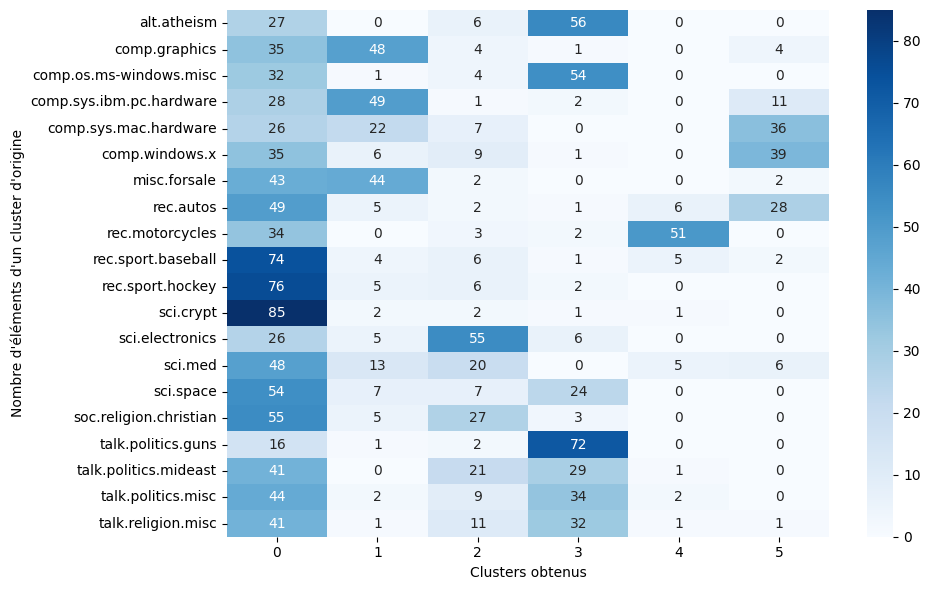

In [ ]:
centres, affectation = clust.kmoyennes(6, bow_no_stopw, 0, 1000, verbose = False)
distribution_target(news_no_stopwords['label'].values, predict_label(affectation))

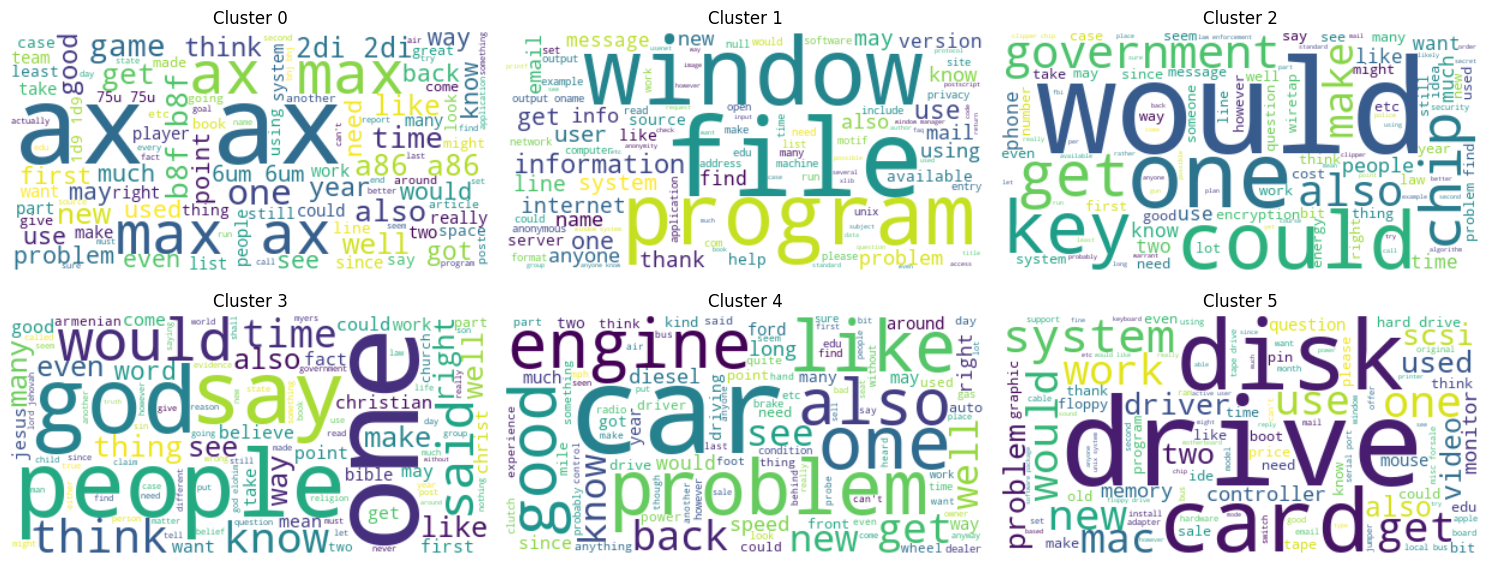

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


n_clusters = 6
pred = predict_label(affectation)
fig, axes = plt.subplots(2, 3, figsize=(15, 6)) 
axes = axes.flatten()

for i in range(n_clusters):
    ax = axes[i]
    
    text = " ".join(news_no_stopwords[pred == i]['messages'].values.flatten())
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100).generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

<Axes: >

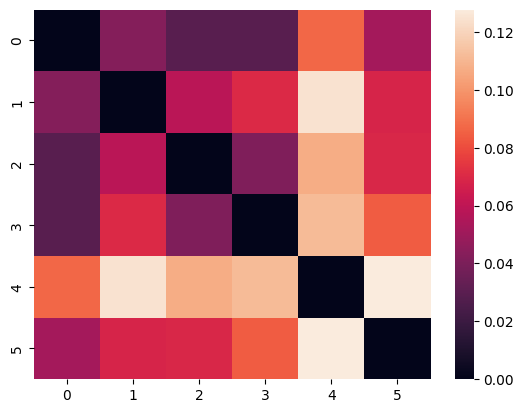

In [24]:
# distance entre clusters
from sklearn.metrics.pairwise import pairwise_distances
sns.heatmap(pairwise_distances(centres, centres, metric='sqeuclidean'))

Pour $k=20$

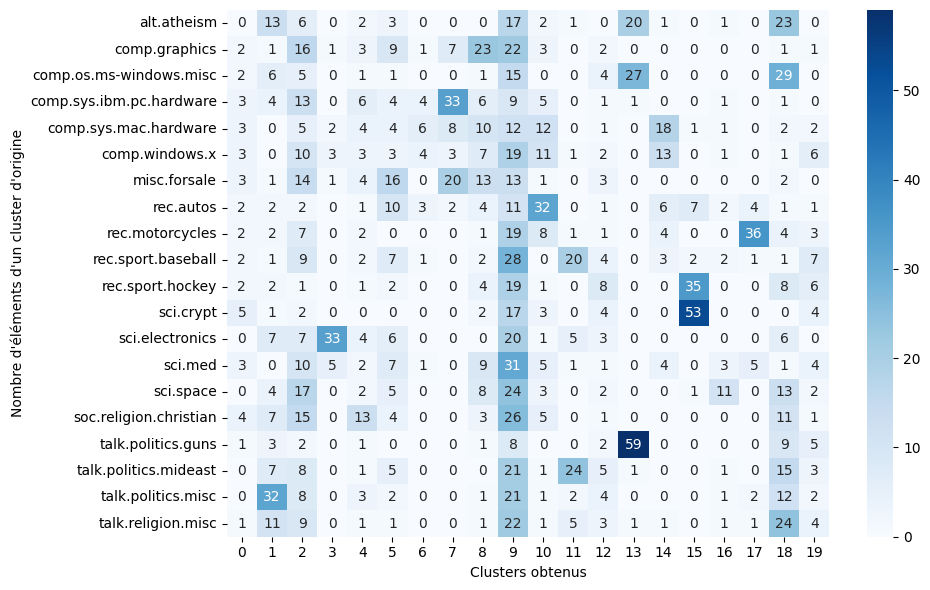

In [25]:
centres, affectation = clust.kmoyennes(20, bow_no_stopw, 0, 1000, verbose = False)
distribution_target(news_no_stopwords['label'].values, predict_label(affectation))

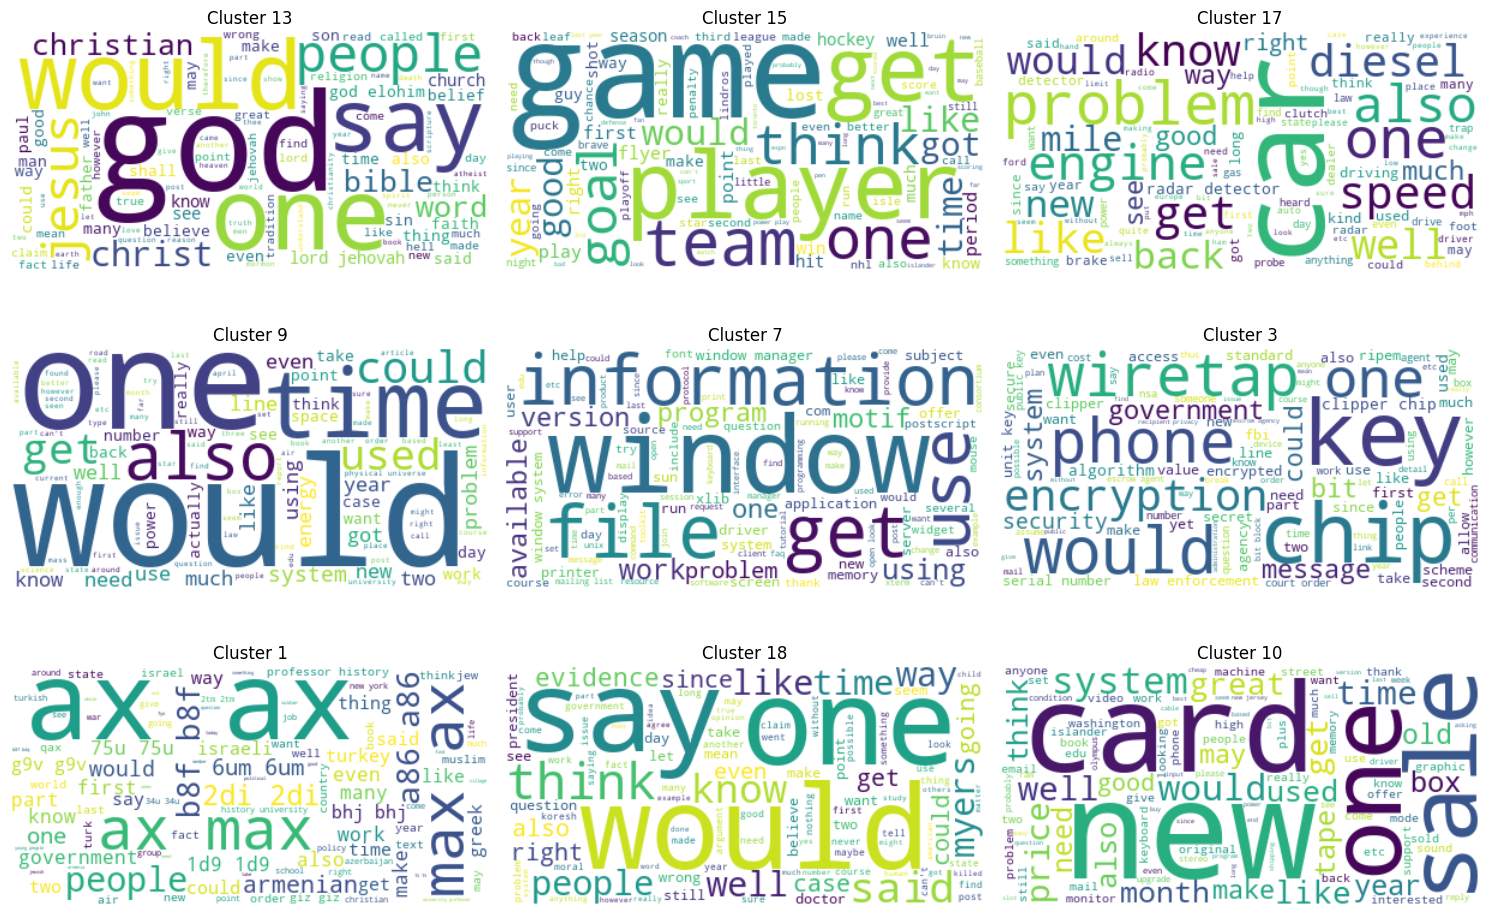

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


clusters_show = [13, 15, 17, 9, 7, 3, 1, 18, 10] 
pred = predict_label(affectation)
fig, axes = plt.subplots(3, 3, figsize=(15, 10)) 
axes = axes.flatten()

for i, clust in enumerate(clusters_show):
    ax = axes[i]
    
    text = " ".join(news_no_stopwords[pred == clust]['messages'].values.flatten())
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100).generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Cluster {clust}')

plt.tight_layout()
plt.show()

<Axes: >

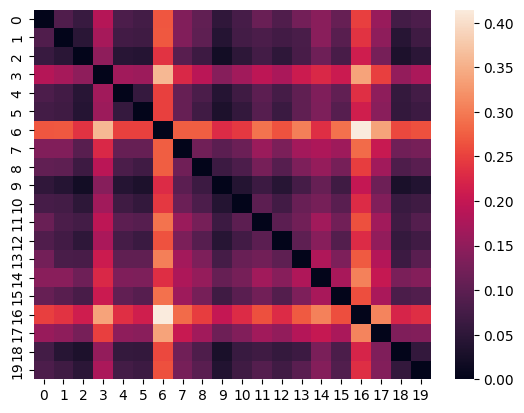

In [28]:
# distance entre clusters
sns.heatmap(pairwise_distances(centres, centres, metric='sqeuclidean'))

---

## Clustering hierarchique

In [184]:
# BoW binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=True)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw.shape

(1815, 3012)

---
Using sklearn

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fca1e2b73d0>>
Traceback (most recent call last):
  File "/home/franciline/anaconda3/envs/py11/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


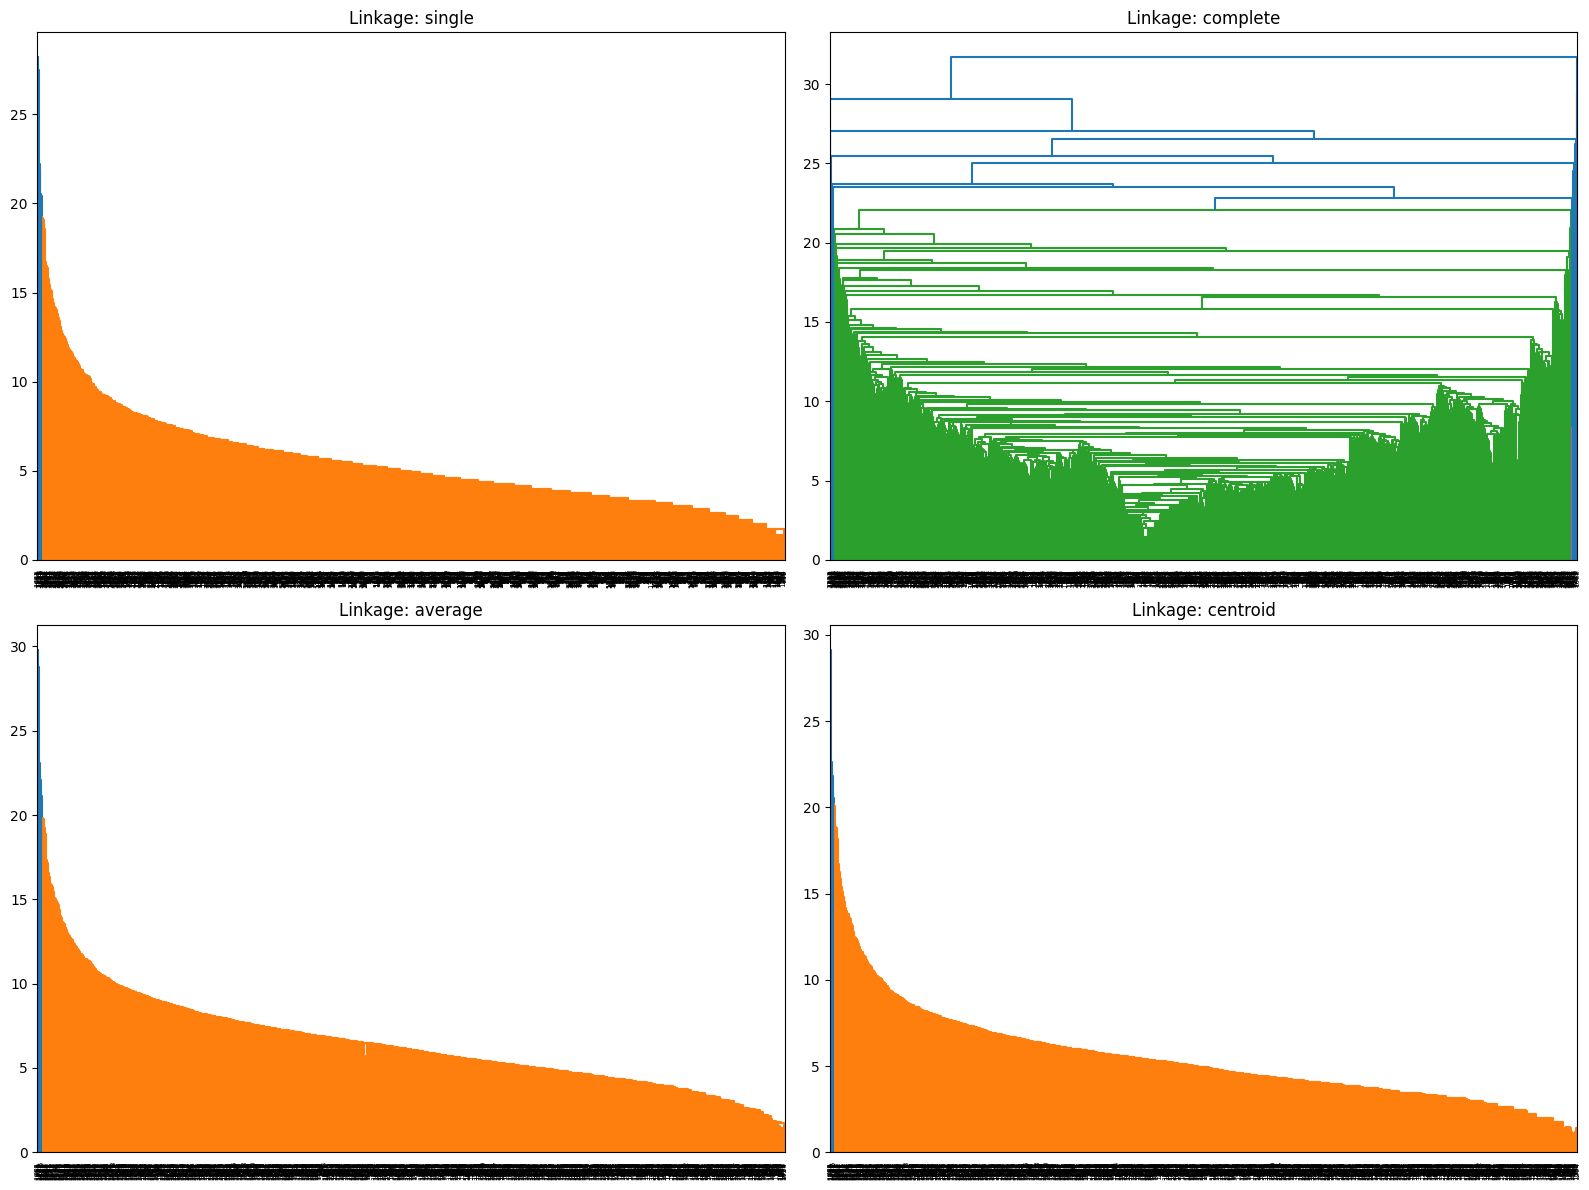

In [196]:
from scipy.cluster.hierarchy import linkage, dendrogram
methods = ['single', 'complete', 'average', 'centroid']

fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
axes = axes.flatten()

# Loop over methods and plot dendrograms
for i, method in enumerate(methods):
    linked = linkage(bow_no_stopw, method=method)
    dendrogram(linked, ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')

plt.suptitle('Clustering hierarchique, bag of words', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

In [ ]:
# BoW binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=False)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw_norm = clust.normalisation(bow_no_stopw)
bow_no_stopw.shape

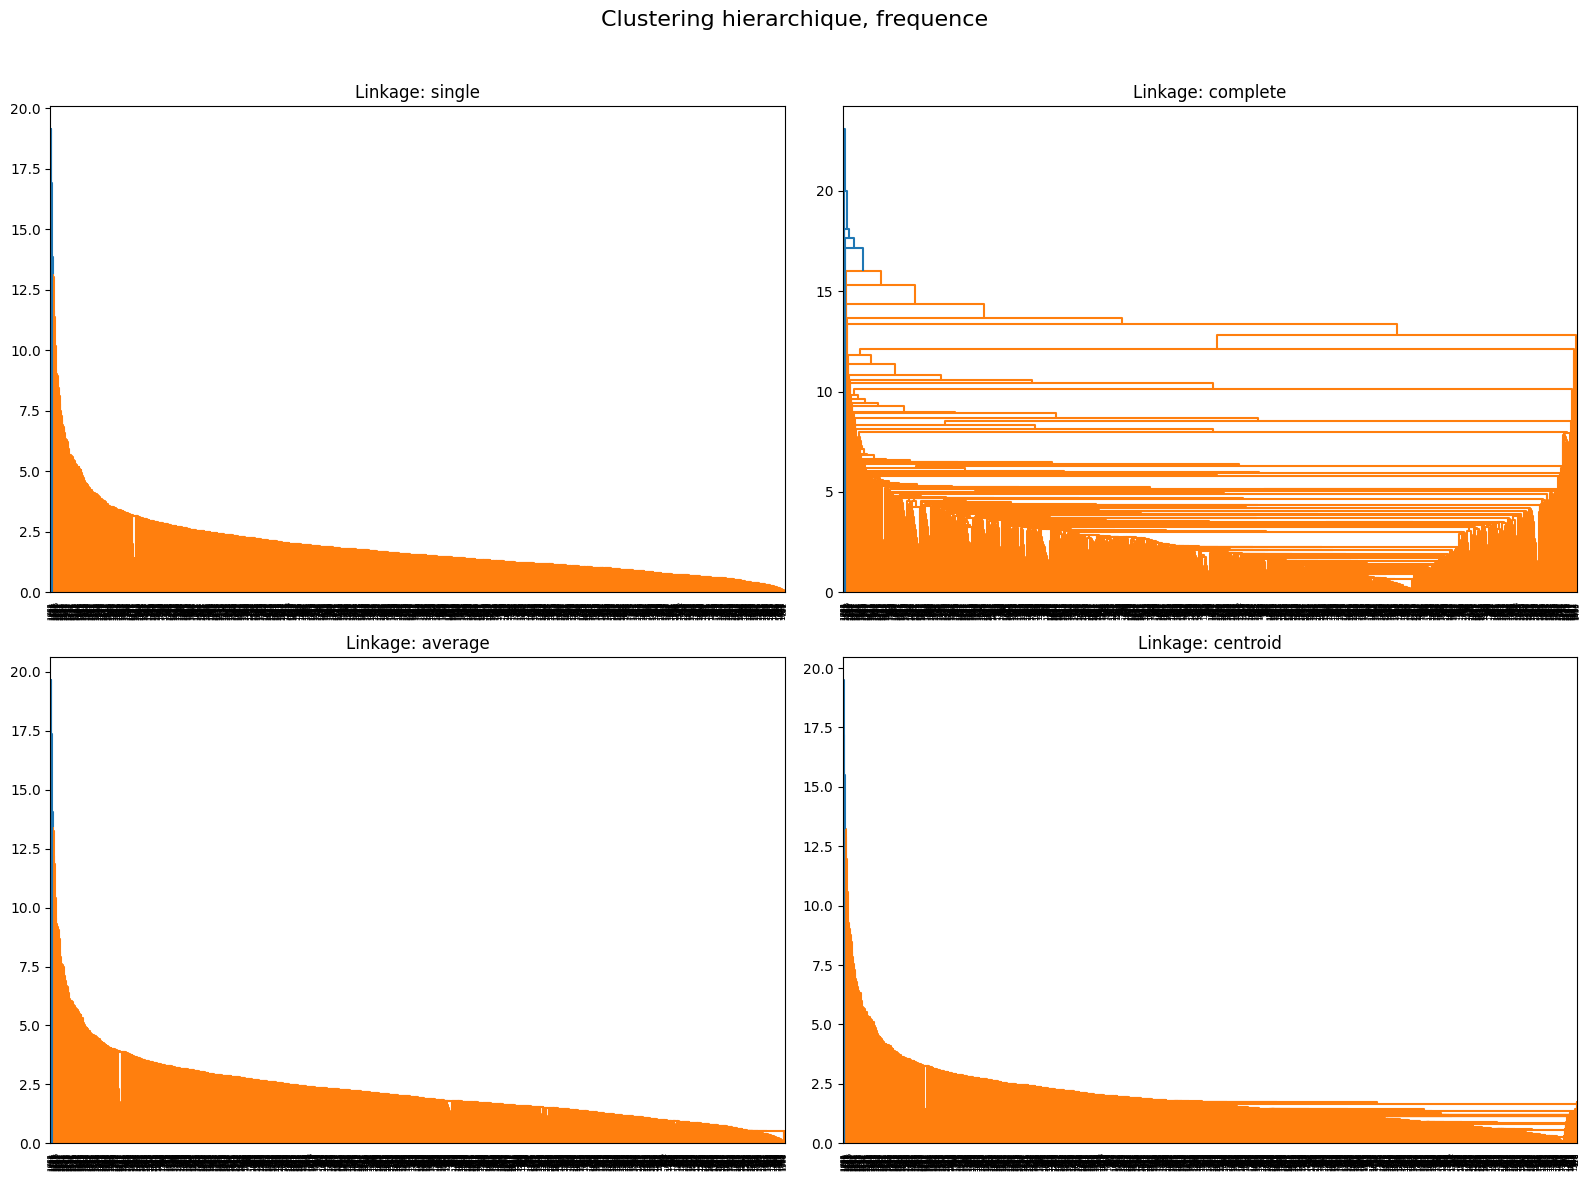

In [241]:
from scipy.cluster.hierarchy import linkage, dendrogram
methods = ['single', 'complete', 'average', 'centroid']

fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
axes = axes.flatten()

# Loop over methods and plot dendrograms
for i, method in enumerate(methods):
    linked = linkage(bow_no_stopw_norm, method=method)
    dendrogram(linked, ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')

plt.suptitle('Clustering hierarchique, frequence', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

In [16]:
# BoW binaire
news_desc = get_tfidf_vect(news_no_stopwords, corpus)
bow_no_stopw = pd.DataFrame(news_desc.todense()) # df BoW
bow_no_stopw.shape

(1815, 3012)

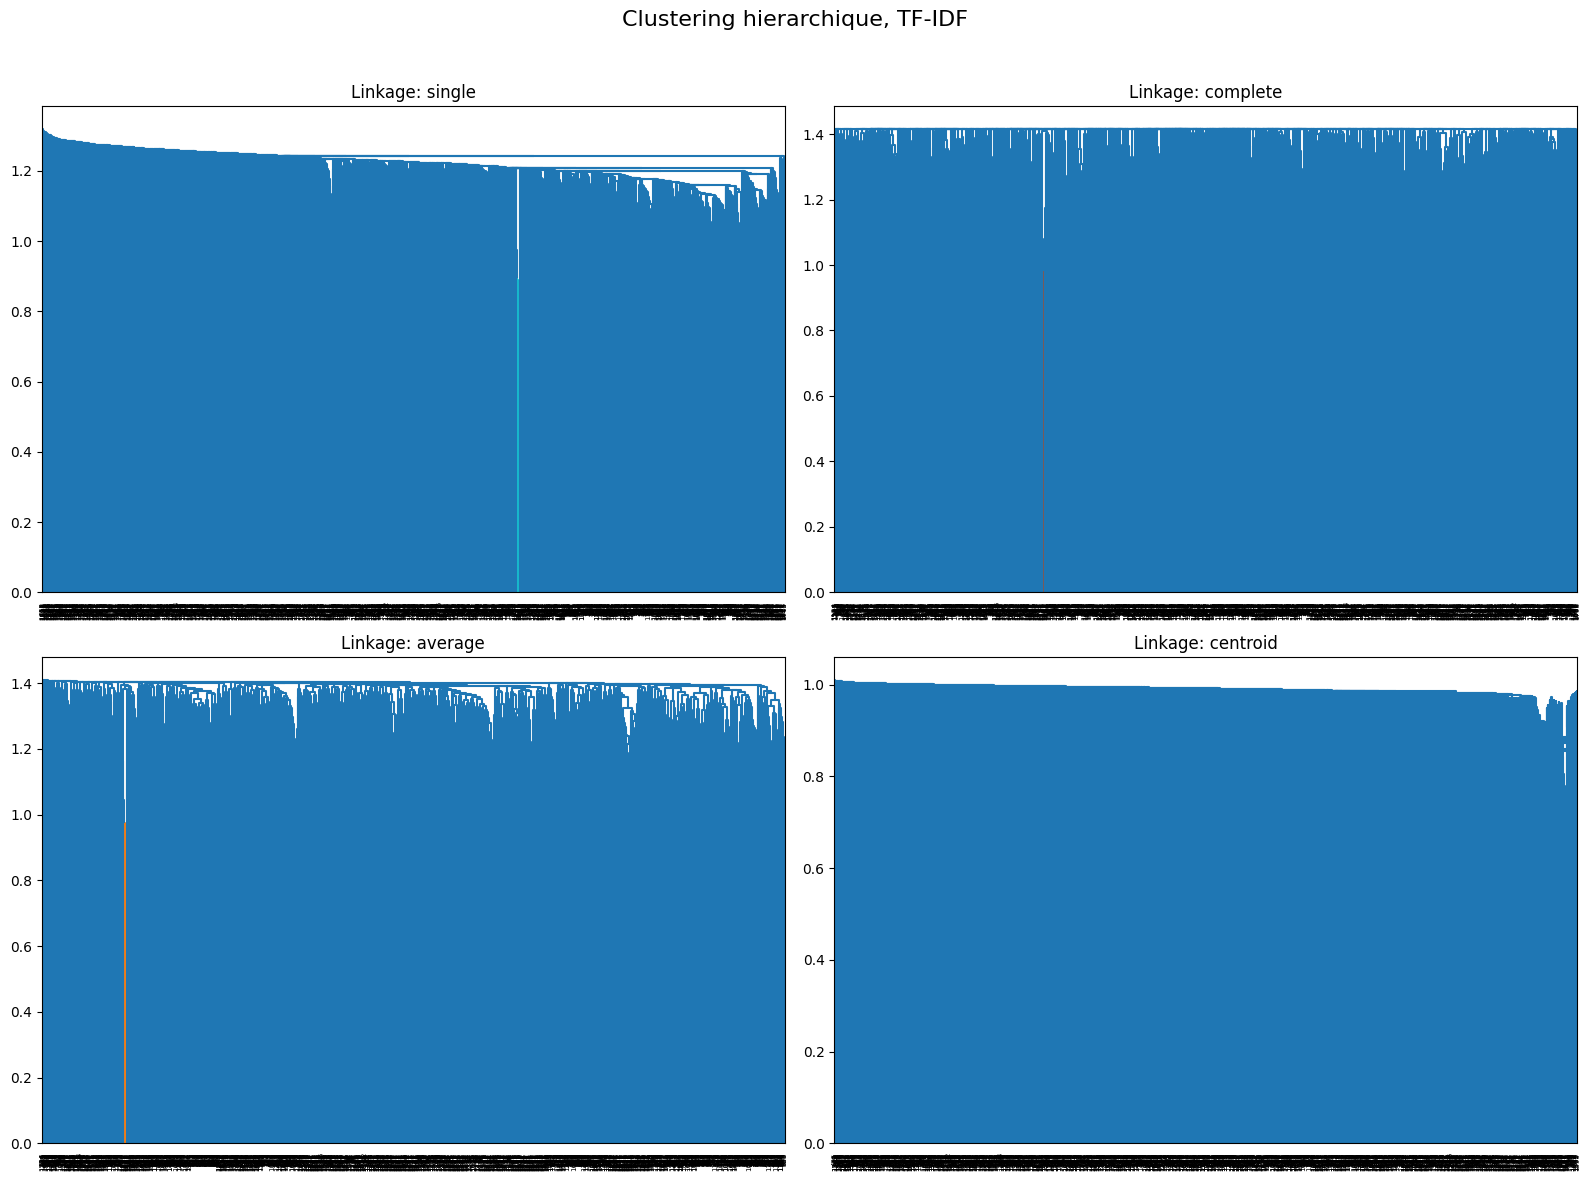

In [200]:
from scipy.cluster.hierarchy import linkage, dendrogram
methods = ['single', 'complete', 'average', 'centroid']

fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
axes = axes.flatten()

# Loop over methods and plot dendrograms
for i, method in enumerate(methods):
    linked = linkage(bow_no_stopw, method=method)
    dendrogram(linked, ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')

plt.suptitle('Clustering hierarchique, TF-IDF', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

---

## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
